In [1]:
import numpy as np
import pandas as pd
#pd.options.display.float_format = '{:.6f}'.format

import os
from time import time
from datetime import datetime as dt
import pickle
from scipy.stats import stats # for moments
from collections import defaultdict
from scipy.fftpack import rfft # only interested in real-value results
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [3]:
!pip install pyarrow

     |████████████████████████████████| 17.4MB 39.5MB/s eta 0:00:01


In [4]:
df_total = pd.read_parquet('classifyactivities.parquet', engine='pyarrow')

In [5]:
df_total.z= df_total.z.astype(float)#previously noted z was object, changed it to float
df_total = df_total.drop(['timestamp'],axis=1)
activities= {'A':'walking','B':'jogging','C':'stairs','D':'sitting','E':'standing','F':'typing','G':'teeth','H':'soup','I':'chips'
             ,'J':'pasta','K':'drinking','L':'sandwich','M':'kicking','O':'catch','P':'dribling','Q':'writing','R':'clapping',
             'S':'folding'}
df_total = df_total.replace({'activity':activities})

df_total.head()

,subjectid,activity,x,y,z,type,device
0,1639,walking,8.288427,-4.857087,9.167398,phone,accel
1,1639,walking,14.506168,-13.624654,14.149732,phone,accel
2,1639,walking,8.800786,-3.229030,4.376601,phone,accel
3,1639,walking,18.195633,-11.740417,0.481235,phone,accel
4,1639,walking,16.316185,-3.992780,-0.986411,phone,accel


In [6]:
# plot the x, y, z acceleration and activities for a single subject
def plot_subject(subject):
    plt.figure()
    # create a plot for each column
    for col in range(subject.shape[1]):
        plt.subplot(subject.shape[1], 1, col+1)
        plt.plot(subject[:,col])
    plt.show()

In [9]:
def single_subject(activities, device, type, subject):
    return df_total.query('activity in ('+activities+') & device == "'+device+'" & type=="'+type+'" & subjectid=='+subject)[['x','y','z','activity']]

In [19]:
#select 6 activities to focus on
min_activities = '"walking","jogging","standing","sitting","dribling"'
#we have 50 subjects starting with 1600
subject_1600 = single_subject(min_activities,'accel','phone','1600').values
subject_1610 = single_subject(min_activities,'accel','phone','1610').values

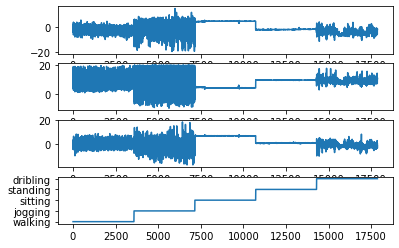

In [21]:
#plot subject 1600
plot_subject(subject_1600)

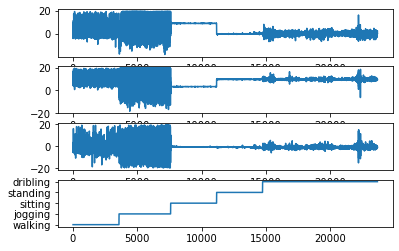

In [22]:
#plot subject 1610
plot_subject(subject_1610)

In [32]:
# plot the x, y, z acceleration for each subject
def plot_subjects(subjects):
    plt.figure()
    # create a plot for each subject
    xaxis = None
    for i in range(len(subjects)):
        ax = plt.subplot(len(subjects), 1, i+1, sharex=xaxis)
        if i == 0:
            xaxis = ax
        # plot a histogram of x data
        for j in range(subjects[i].shape[1]-1):
            plt.hist(subjects[i][:,j], bins=100)
    plt.show()

In [23]:
#creates a new list to show multiple subjects on the same plot
subjects = list()
subjects.append(subject_1600)
subjects.append(subject_1610)

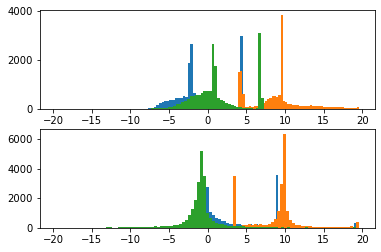

In [33]:
#creates 2 plots , one for each subject, showing 1 histogram for each variable(x,y,z)
plot_subjects(subjects)

### On both plots we see a variables x(blue) and z(green) are mostly grouped together and y(orange) is separated to the right